In [21]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
dataset = load_dataset('huggan/wikiart', split='train', streaming=True)  
file_path = 'data/wikiart_metadata.csv'


with open(file_path, mode='a', encoding='utf-8') as file:
    write_header = True
    for sample in dataset:
        sample_df = pd.DataFrame([sample])
        sample_df = sample_df.drop(columns=['image'], errors='ignore')
        sample_df.to_csv(file, index=False, header=write_header)
        write_header = False



In [ ]:
"""   
DataFrame shape (rows, columns): (81444, 3)

Columns and data types:

    artist    object
    genre     object
    style     object
    dtype: object
    
"""

In [18]:
genre_mapping = {
    0: "abstract_painting",
    1: "cityscape",
    2: "genre_painting",
    3: "illustration",
    4: "landscape",
    5: "nude_painting",
    6: "portrait",
    7: "religious_painting",
    8: "sketch_and_study",
    9: "still_life",
    10: "Unknown Genre"
}
artist_names = ["Unknown Artist", "boris-kustodiev", "camille-pissarro", "childe-hassam", "claude-monet", "edgar-degas", "eugene-boudin", "gustave-dore", "ilya-repin", "ivan-aivazovsky", "ivan-shishkin", "john-singer-sargent", "marc-chagall", "martiros-saryan", "nicholas-roerich", "pablo-picasso", "paul-cezanne", "pierre-auguste-renoir", "pyotr-konchalovsky", "raphael-kirchner", "rembrandt", "salvador-dali", "vincent-van-gogh", "hieronymus-bosch", "leonardo-da-vinci", "albrecht-durer", "edouard-cortes", "sam-francis", "juan-gris", "lucas-cranach-the-elder", "paul-gauguin", "konstantin-makovsky", "egon-schiele", "thomas-eakins", "gustave-moreau", "francisco-goya", "edvard-munch", "henri-matisse", "fra-angelico", "maxime-maufra", "jan-matejko", "mstislav-dobuzhinsky", "alfred-sisley", "mary-cassatt", "gustave-loiseau", "fernando-botero", "zinaida-serebriakova", "georges-seurat", "isaac-levitan", "joaqu\u00e3\u00adn-sorolla", "jacek-malczewski", "berthe-morisot", "andy-warhol", "arkhip-kuindzhi", "niko-pirosmani", "james-tissot", "vasily-polenov", "valentin-serov", "pietro-perugino", "pierre-bonnard", "ferdinand-hodler", "bartolome-esteban-murillo", "giovanni-boldini", "henri-martin", "gustav-klimt", "vasily-perov", "odilon-redon", "tintoretto", "gene-davis", "raphael", "john-henry-twachtman", "henri-de-toulouse-lautrec", "antoine-blanchard", "david-burliuk", "camille-corot", "konstantin-korovin", "ivan-bilibin", "titian", "maurice-prendergast", "edouard-manet", "peter-paul-rubens", "aubrey-beardsley", "paolo-veronese", "joshua-reynolds", "kuzma-petrov-vodkin", "gustave-caillebotte", "lucian-freud", "michelangelo", "dante-gabriel-rossetti", "felix-vallotton", "nikolay-bogdanov-belsky", "georges-braque", "vasily-surikov", "fernand-leger", "konstantin-somov", "katsushika-hokusai", "sir-lawrence-alma-tadema", "vasily-vereshchagin", "ernst-ludwig-kirchner", "mikhail-vrubel", "orest-kiprensky", "william-merritt-chase", "aleksey-savrasov", "hans-memling", "amedeo-modigliani", "ivan-kramskoy", "utagawa-kuniyoshi", "gustave-courbet", "william-turner", "theo-van-rysselberghe", "joseph-wright", "edward-burne-jones", "koloman-moser", "viktor-vasnetsov", "anthony-van-dyck", "raoul-dufy", "frans-hals", "hans-holbein-the-younger", "ilya-mashkov", "henri-fantin-latour", "m.c.-escher", "el-greco", "mikalojus-ciurlionis", "james-mcneill-whistler", "karl-bryullov", "jacob-jordaens", "thomas-gainsborough", "eugene-delacroix", "canaletto"]
artist_mapping = {index: name for index, name in enumerate(artist_names)}

style_names = ["Abstract_Expressionism", "Action_painting", "Analytical_Cubism", "Art_Nouveau", "Baroque", "Color_Field_Painting", "Contemporary_Realism", "Cubism", "Early_Renaissance", "Expressionism", "Fauvism", "High_Renaissance", "Impressionism", "Mannerism_Late_Renaissance", "Minimalism", "Naive_Art_Primitivism", "New_Realism", "Northern_Renaissance", "Pointillism", "Pop_Art", "Post_Impressionism", "Realism", "Rococo", "Romanticism", "Symbolism", "Synthetic_Cubism", "Ukiyo_e"]
style_mapping = {index: style for index, style in enumerate(style_names)}

In [19]:
df = pd.read_csv('data/wikiart_metadata.csv')

df['artist'] = df['artist'].map(artist_mapping)
df['genre'] = df['genre'].map(genre_mapping)
df['style'] = df['style'].map(style_mapping)

In [20]:
df.head(5)

,artist,genre,style
0,vincent-van-gogh,landscape,Realism
1,rembrandt,religious_painting,Baroque
2,paul-cezanne,portrait,Post_Impressionism
3,pierre-auguste-renoir,genre_painting,Impressionism
4,ivan-aivazovsky,Unknown Genre,Romanticism


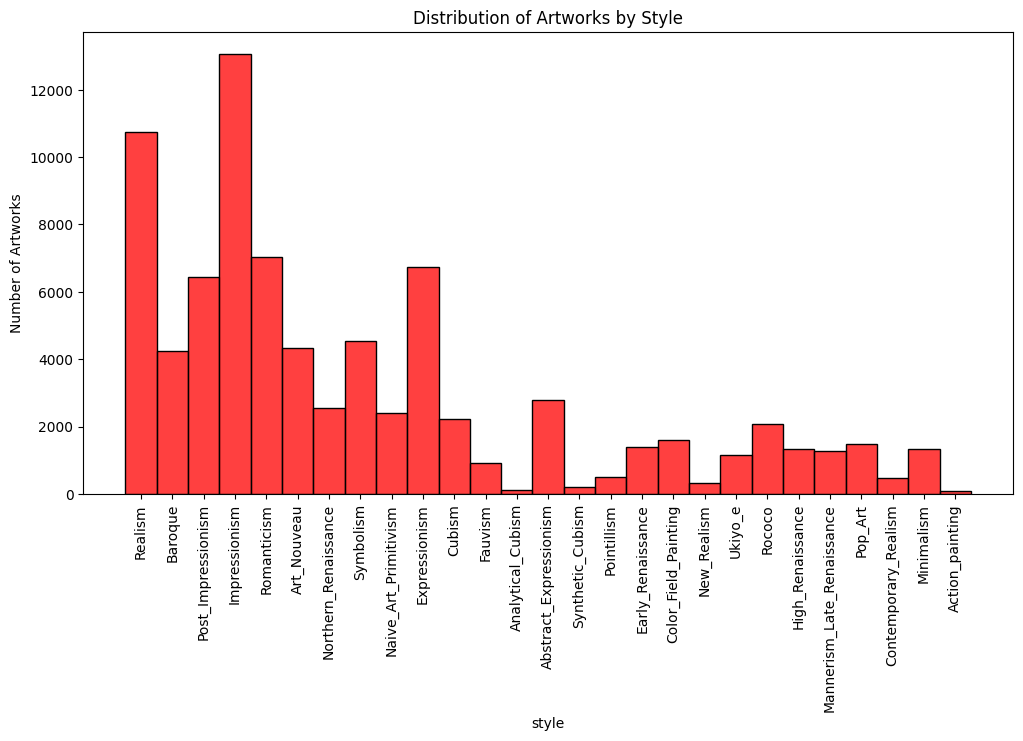

In [27]:
# distribution of style
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='style', kde=False, color='red', edgecolor='black')
plt.title('Distribution of Artworks by Style')
plt.xlabel('style')
plt.ylabel('Number of Artworks')
plt.xticks(rotation=90)
plt.show()


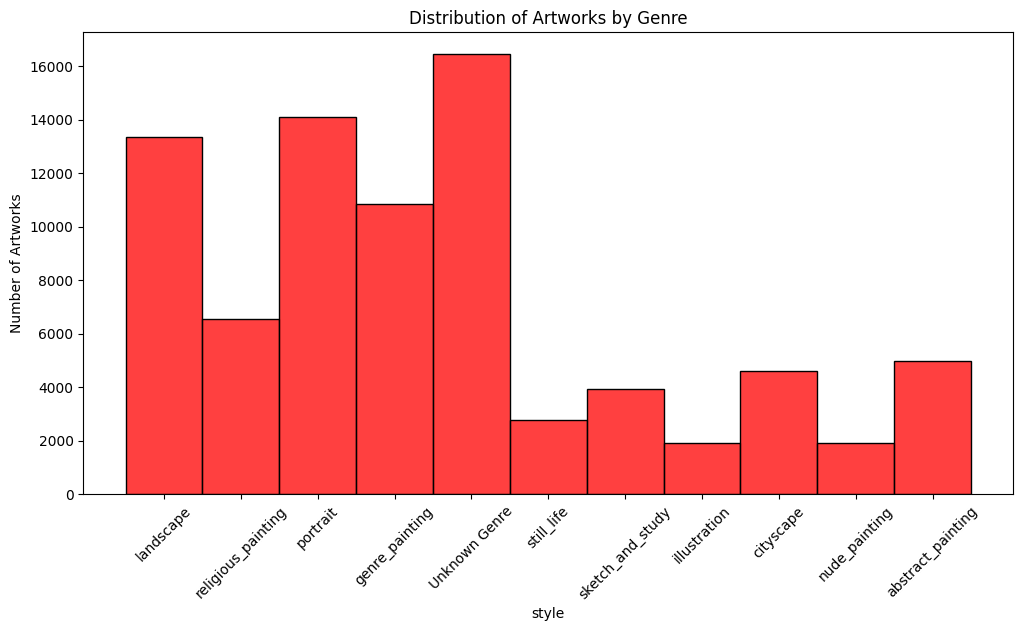

In [29]:
# distribution of genre
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='genre', kde=False, color='red', edgecolor='black')
plt.title('Distribution of Artworks by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Artworks')
plt.xticks(rotation=45)
plt.show()

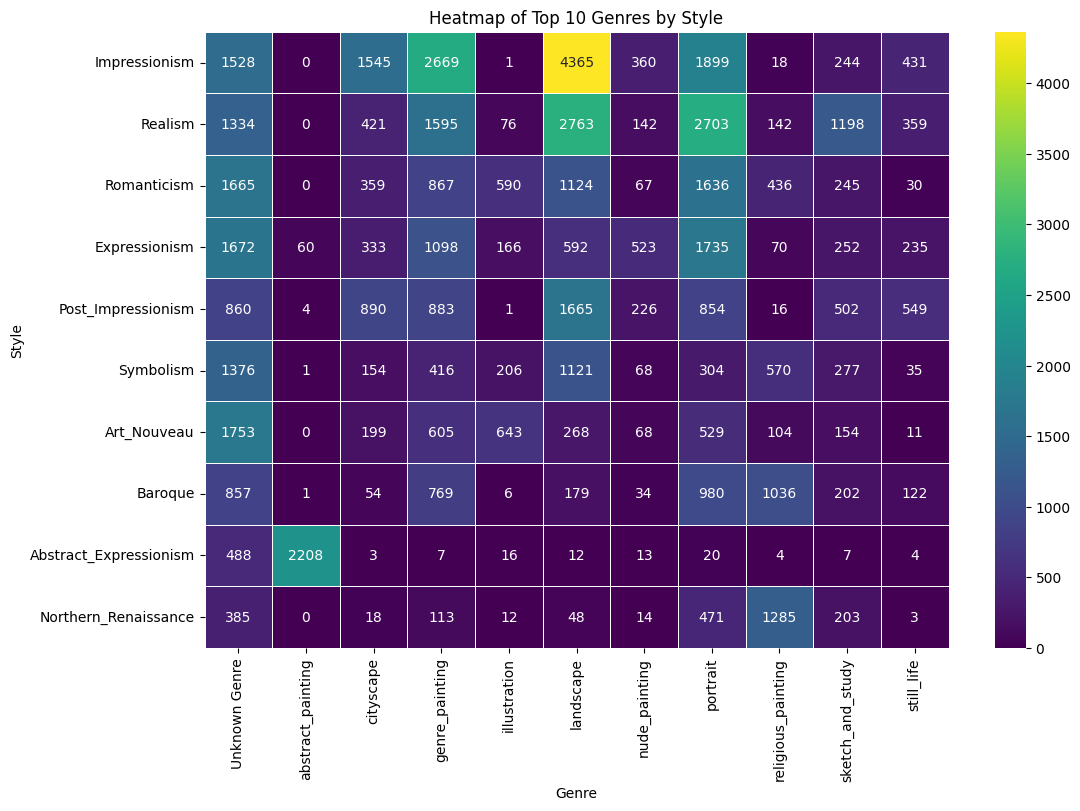

In [32]:
# heatmap of top 10 genre by style
pivot_table = df.pivot_table(index='style', columns='genre', aggfunc='size', fill_value=0)
style_sums = pivot_table.sum(axis=1)
top_styles = style_sums.sort_values(ascending=False).head(10)
top_pivot_table = pivot_table.loc[top_styles.index]

plt.figure(figsize=(12, 8))
sns.heatmap(top_pivot_table, annot=True, fmt="d", cmap='viridis', linewidths=.5)
plt.title('Heatmap of Top 10 Genres by Style')
plt.xlabel('Genre')
plt.ylabel('Style')
plt.show()

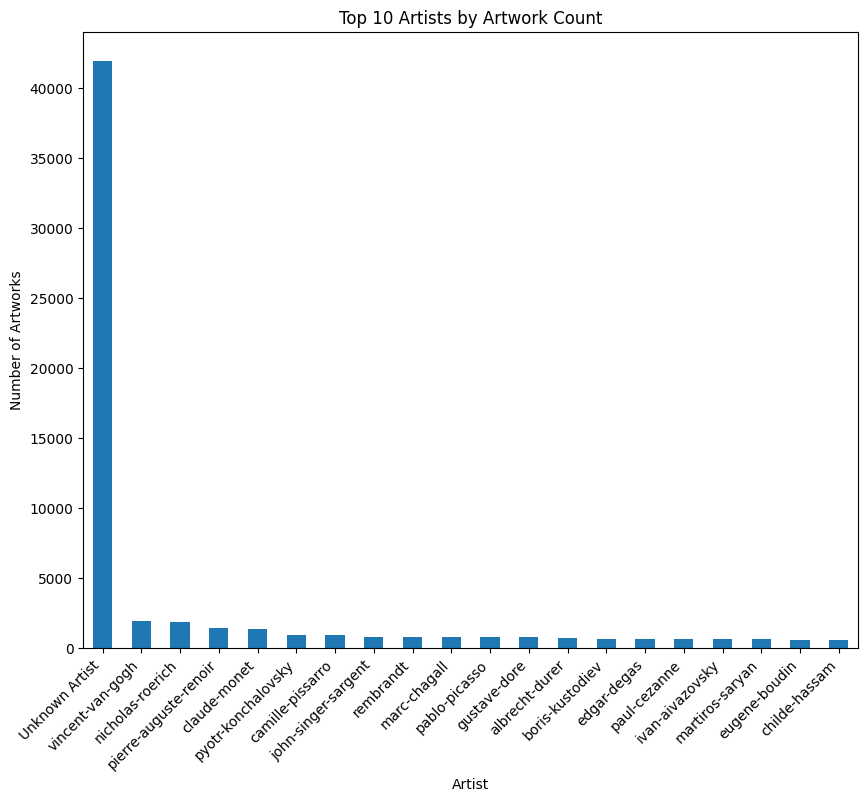

In [37]:
# distribution of Top artists
artist_counts = df['artist'].value_counts().head(20)

plt.figure(figsize=(10, 8))
artist_counts.plot(kind='bar')
plt.title('Top 20 Artists by Artwork Count')
plt.xlabel('Artist')
plt.ylabel('Number of Artworks')
plt.xticks(rotation=45, ha='right')
plt.show()

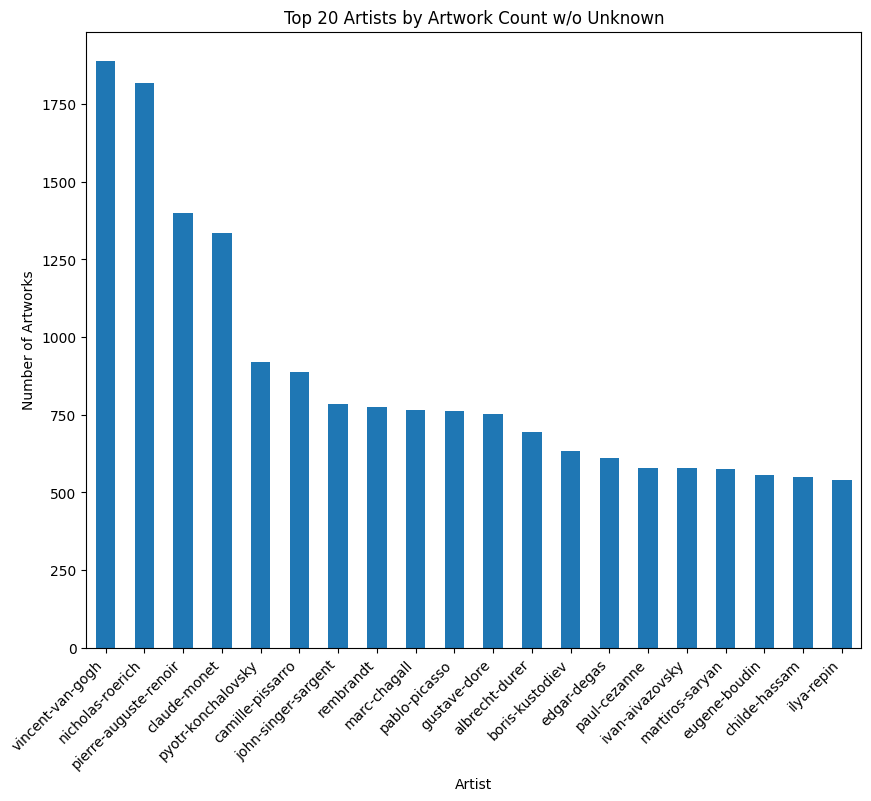

In [40]:
# distribution of Top artists minus unknown
artist_counts = df['artist'].value_counts()[1:21]


plt.figure(figsize=(10, 8))
artist_counts.plot(kind='bar')
plt.title('Top 20 Artists by Artwork Count w/o Unknown')
plt.xlabel('Artist')
plt.ylabel('Number of Artworks')
plt.xticks(rotation=45, ha='right')
plt.show()